In [19]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
result1 = pd.read_csv("result.csv")
result1

,jobTitle,jobLocation,applicantsCount,viewsCount,jobPosterProfileUrl,postedAt,appliesClosed,applyUrl,jobDescription,remoteAllowed,...,companyUrl,matchedSkills,jobFunctions,jobIndustries,appliesClosedAt,jobType,jobUrl,timestamp,query,error
0,Sales Data Analyst,"Boston, MA, US",94.0,369.0,NaN,2020-05-04T19:39:42.000Z,False,https://careers-logmein.icims.com/jobs/58298/s...,The Sales Data Analyst will report to the Mana...,False,...,https://www.linkedin.com/company/37788,NaN,Information Technology,"Information Technology & Services, Computer So...",2020-06-03T19:39:43.000Z,Full-time,https://www.linkedin.com/jobs/view/1844899644/,2020-05-08T05:50:39.520Z,https://www.linkedin.com/jobs/view/1844899644/,NaN
1,Data Analyst,"Boston, MA, US",125.0,556.0,NaN,2020-04-08T15:29:30.000Z,False,http://us.experteer.com/career/lp/signup_verti...,Gupta Media is looking for a Data Analyst to j...,False,...,https://www.linkedin.com/company/965942,NaN,Information Technology,"Marketing & Advertising, Online Media, Public ...",2020-05-29T16:12:18.000Z,Full-time,https://www.linkedin.com/jobs/view/1825907067/,2020-05-08T05:50:42.137Z,https://www.linkedin.com/jobs/view/1825907067/,NaN
2,Data Analyst,"Redmond, WA, US",29.0,145.0,NaN,2020-04-09T09:41:36.000Z,False,https://jooble.org/external/302270252132641246...,Our organization delivers top-notch business i...,False,...,https://www.linkedin.com/company/2160229,NaN,Information Technology,"Information Technology & Services, Computer So...",2020-06-03T09:41:36.000Z,Full-time,https://www.linkedin.com/jobs/view/1850008386/,2020-05-08T05:50:44.789Z,https://www.linkedin.com/jobs/view/1850008386/,NaN
3,Data Analyst,"Boston, MA, US",17.0,52.0,NaN,2020-04-09T06:23:33.000Z,False,https://jooble.org/external/-88061097574779428...,About Burning Glass\n\nBurning Glass Technolog...,False,...,https://www.linkedin.com/company/138182,NaN,Information Technology,"Marketing & Advertising, Information Technolog...",2020-06-03T06:23:33.000Z,Full-time,https://www.linkedin.com/jobs/view/1849860325/,2020-05-08T05:50:47.403Z,https://www.linkedin.com/jobs/view/1849860325/,NaN
4,"Data Analyst, Analytics","New York City, NY, US",151.0,730.0,NaN,2020-04-06T00:44:44.000Z,False,https://www.hospitalityjobsite.com/job.asp?id=...,Overview\n\nThe Orchard is a leading music dis...,False,...,https://www.linkedin.com/company/19615,NaN,Information Technology,Restaurants,2020-05-31T00:44:44.000Z,Full-time,https://www.linkedin.com/jobs/view/1844342450/,2020-05-08T05:50:50.280Z,https://www.linkedin.com/jobs/view/1844342450/,NaN
5,Data Analyst (R&D),"Santa Barbara, CA, US",52.0,182.0,NaN,2020-05-07T10:28:27.000Z,False,http://www.linkup.com/details/a44df391849e8d7d...,About Us\n\nHeadquartered in beautiful Santa B...,False,...,https://www.linkedin.com/company/1311279,NaN,Information Technology,"Marketing & Advertising, Information Technolog...",2020-06-06T10:37:07.000Z,Full-time,https://www.linkedin.com/jobs/view/1853136208/,2020-05-08T05:50:52.877Z,https://www.linkedin.com/jobs/view/1853136208/,NaN
6,Data Analyst - San Francisco,"San Francisco, CA, US",225.0,816.0,NaN,2020-05-05T04:57:17.000Z,False,https://careers-milestonepowered.icims.com/job...,Overview\n\n Company Overview \n\nMilestone Te...,False,...,https://www.linkedin.com/company/37768,NaN,Information Technology,"Information Technology & Services, Computer So...",2020-06-04T04:57:17.000Z,Full-time,https://www.linkedin.com/jobs/view/1845325013/,2020-05-08T05:50:55.420Z,https://www.linkedin.com/jobs/view/1845325013/,NaN
7,Data Analyst,"Costa Mesa, CA, US",448.0,1967.0,NaN,2020-04-26T10:33:13.000Z,False,https://veritone.csod.com/ats/careersite/JobDe...,\n\nData Analyst\n\nWho We Are\n\nVeritone (Na...,False,...,https://www.linkedin.com/company/6442206,NaN,Information Technology,"Marketing & Advertising, Computer Software, In...",2020-05-30T18:21:03.000Z,Full-time,https://www.linkedin.com/jobs/view/1753491773/,2020-05-08T05:50:58.043Z,https://www.linkedin.com/jobs/view/1753491773/,NaN
8,Operatio

In [9]:
result2 = pd.read_csv("result2.csv")
result3 = pd.read_csv("result3.csv")
result4 = pd.read_csv("result4.csv")
result = pd.concat([result1,result2,result3,result4], axis=0)
display(result)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,applicantsCount,appliesClosed,appliesClosedAt,applyUrl,companyName,companyUrl,error,jobDescription,jobFunctions,jobIndustries,...,jobPosterProfileUrl,jobTitle,jobType,jobUrl,matchedSkills,postedAt,query,remoteAllowed,timestamp,viewsCount
0,94.0,False,2020-06-03T19:39:43.000Z,https://careers-logmein.icims.com/jobs/58298/s...,LogMeIn,https://www.linkedin.com/company/37788,NaN,The Sales Data Analyst will report to the Mana...,Information Technology,"Information Technology & Services, Computer So...",...,NaN,Sales Data Analyst,Full-time,https://www.linkedin.com/jobs/view/1844899644/,NaN,2020-05-04T19:39:42.000Z,https://www.linkedin.com/jobs/view/1844899644/,False,2020-05-08T05:50:39.520Z,369.0
1,125.0,False,2020-05-29T16:12:18.000Z,http://us.experteer.com/career/lp/signup_verti...,Gupta Media,https://www.linkedin.com/company/965942,NaN,Gupta Media is looking for a Data Analyst to j...,Information Technology,"Marketing & Advertising, Online Media, Public ...",...,NaN,Data Analyst,Full-time,https://www.linkedin.com/jobs/view/1825907067/,NaN,2020-04-08T15:29:30.000Z,https://www.linkedin.com/jobs/view/1825907067/,False,2020-05-08T05:50:42.137Z,556.0
2,29.0,False,2020-06-03T09:41:36.000Z,https://jooble.org/external/302270252132641246...,Decisive Data,https://www.linkedin.com/company/2160229,NaN,Our organization delivers top-notch business i...,Information Technology,"Information Technology & Services, Computer So...",...,NaN,Data Analyst,Full-time,https://www.linkedin.com/jobs/view/1850008386/,NaN,2020-04-09T09:41:36.000Z,https://www.linkedin.com/jobs/view/1850008386/,False,2020-05-08T05:50:44.789Z,145.0
3,17.0,False,2020-06-03T06:23:33.000Z,https://jooble.org/external/-88061097574779428...,Burning Glass Technologies,https://www.linkedin.com/company/138182,NaN,About Burning Glass\n\nBurning Glass Technolog...,Information Technology,"Marketing & Advertising, Information Technolog...",...,NaN,Data Analyst,Full-time,https://www.linkedin.com/jobs/view/1849860325/,NaN,2020-04-09T06:23:33.000Z,https://www.linkedin.com/jobs/view/1849860325/,False,2020-05-08T05:50:47.403Z,52.0
4,151.0,False,2020-05-31T00:44:44.000Z,https://www.hospitalityjobsite.com/job.asp?id=...,The Orchard,https://www.linkedin.com/company/19615,NaN,Overview\n\nThe Orchard is a leading music dis...,Information Technology,Restaurants,...,NaN,"Data Analyst, Analytics",Full-time,https://www.linkedin.com/jobs/view/1844342450/,NaN,2020-04-06T00:44:44.000Z,https://www.linkedin.com/jobs/view/1844342450/,False,2020-05-08T05:50:50.280Z,730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2170.0,False,2020-05-27T01:07:46.000Z,https://www.tesla.com/careers/job/id=62450,Tesla,https://www.linkedin.com/company/15564,NaN,The Role\n\nAs a Data Analyst on the Supply Ch...,Information Technology,"Marketing & Advertising, Automotive, Staffing ...",...,NaN,Data Analyst,Full-time,https://www.linkedin.com/jobs/view/1786934097/,NaN,2020-03-20T05:08:24.000Z,https://www.linkedin.com/jobs/view/1786934097/,False,2020-05-08T05:21:02.502Z,8260.0
59,145.0,False,2020-06-06T10:26:50.000Z,https://jobs.lever.co/insurify/edcce05e-6086-4...,Insurify,https://www.linkedin.com/company/9347889,NaN,Do you want to be part of Boston’s hottest up ...,Information Technology,"Online Media, Internet, Financial Services",...,NaN,Data Analyst,Full-time,https://www.linkedin.com/jobs/view/1842982644/,NaN,2020-04-05T11:29:39.000Z,https://www.linkedin.com/jobs/view/1842982644/,False,2020-05-08T05:21:05.188Z,486.0
60,203.0,False,2020-05-30T09:16:17.000Z,https://jobs.lever.co/dave/eda12d24-28cc-484f-...,Dave - Banking For Humans,https://www.linkedin.com/company/18037479,NaN,Dave is the finance version of David and Golia...,Information Technology,"Computer Software, Internet, Financial Services",...,NaN,Product Data Analyst,Full-time,https://www.linkedin.com/jobs/view/1828760253/,NaN,2020-04-17T17:10:49.000Z,https://www.linkedin.com/jobs/view/1828760253/,False,2020-05-08T05:21:07.971Z,

In [17]:
text = " ".join(str(desc) for desc in result.jobDescription)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 679397 words in the combination of all review.


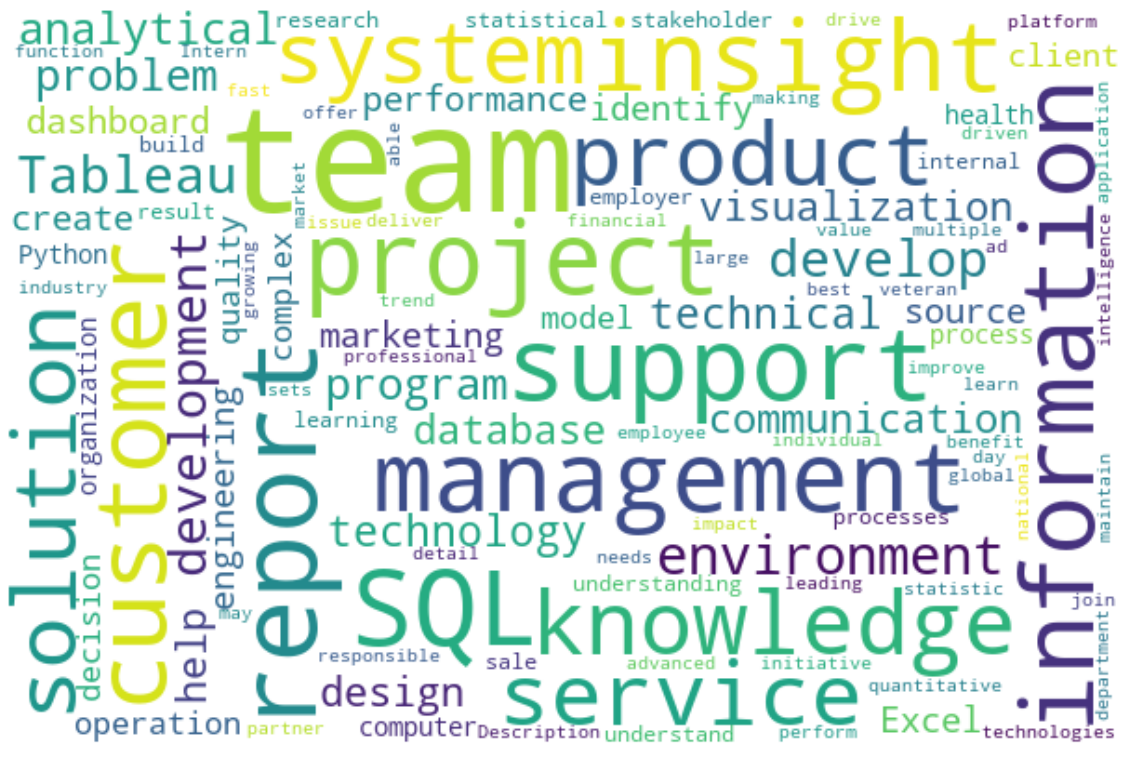

In [49]:
stopwords = set(STOPWORDS)
stopwords.update(['Responsibilities', 'Requirement', 'requirements', 'business', 'data', 'reporting', 'required',
                              'Qualifications', 'will', 'company', 'Analyst', 'new', 'working', 'using',
                             'ability', 'analysis', 'skill', 'skills', 'experience', 'provide',
                             'strong', 'Job', 'role', 'candidate', 'year','years','work','works','analytics','applicant',
                             'need', 'make', 'including', 'employee','degree', 'related','within', 'time','equal','position',
                            'across', 'based', 'status','office', 'looking', 'client', 'written','preferred', 'education','etc',
                             'key','employment', 'Excellent', 'level','opportunity','high','opportunities', 'analyze',
                             'Must', 'Science', 'people', 'various', 'tool', 'race','sexual','well', 'religion','sex',
                             'please','culture', 'without','one', 'Location','us','member','set','user','use','disability',
                             'gender', 'field', 'Bachelor', 'tools'])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white", 
                      collocations=False,
                      width=600, height=400, 
                      max_font_size=80, min_font_size=10).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
ba1 = pd.read_csv("ba1.csv")
ba2 = pd.read_csv("ba2.csv")
ba3 = pd.read_csv("ba3.csv")
ba4 = pd.read_csv("ba4.csv")
ba5 = pd.read_csv("ba5.csv")

business_analyst = pd.concat([ba1,ba2,ba3,ba4,ba5], axis=0)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [51]:
text_ba = " ".join(str(desc) for desc in business_analyst.jobDescription)
print ("There are {} words in the combination of all review.".format(len(text_ba)))

There are 737074 words in the combination of all review.


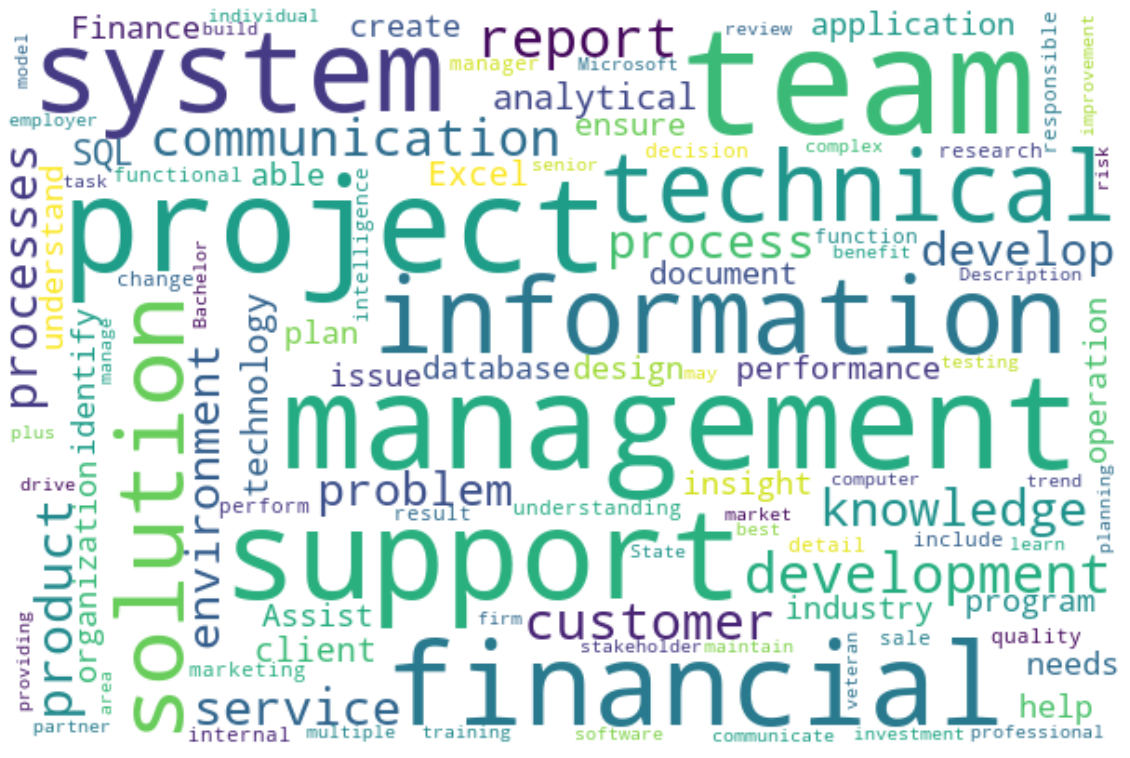

In [52]:
stopwords = set(STOPWORDS)
stopwords.update(['Responsibilities', 'Requirement', 'requirements', 'business', 'data', 'reporting', 'required',
                              'Qualifications', 'will', 'company', 'Analyst', 'new', 'working', 'using',
                             'ability', 'analysis', 'skill', 'skills', 'experience', 'provide',
                             'strong', 'Job', 'role', 'candidate', 'year','years','work','works','analytics','applicant',
                             'need', 'make', 'including', 'employee','degree', 'related','within', 'time','equal','position',
                            'across', 'based', 'status','office', 'looking', 'client', 'written','preferred', 'education','etc',
                             'key','employment', 'Excellent', 'level','opportunity','high','opportunities', 'analyze',
                             'Must', 'Science', 'people', 'various', 'tool', 'race','sexual','well', 'religion','sex',
                             'please','culture', 'without','one', 'Location','us','member','set','user','use','disability',
                             'gender', 'field', 'Bachelor', 'tools'])
# Generate a word cloud image
wordcloud_ba = WordCloud(stopwords=stopwords, 
                      background_color="white", 
                      collocations=False,
                      width=600, height=400, 
                      max_font_size=80, min_font_size=10).generate(text_ba)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[20,20])
plt.imshow(wordcloud_ba, interpolation='bilinear')
plt.axis("off")
plt.show()